## Gerekli Kütüphanelerin Eklenmesi

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

## Proje Başlamadan Önce Bazı Ayarlar

In [2]:
pd.set_option('display.max_columns', None) # Bütün kolonların gösterilmesini sağlıyoruz.
pd.set_option('display.width', 100) # Dataframe'lerin genişliğini belirliyoruz
pd.set_option('display.float_format', lambda x: '%.2f' % x) # Dataframe'lerde görselliği bozmaması için sayıların virgünden sonraki sadece iki 
# rakamı göstermesini sağlıyoruz

## Veri Motorunun İnşası

In [40]:
def finansal_veri_simulasyonu(satir_sayisi = 1000, baslangic_tarihi = '2023.01.01') : 
    
    tarih_havuzu = pd.date_range(baslangic_tarihi, periods=365, freq = 'D')
    islem_tarihleri = np.random.choice(tarih_havuzu, satir_sayisi, replace=True)
    

    harcama_profili = {
        'Market':{
            'aciklamalar': ['BIM', 'A101', 'Migros', 'Şok Market', 'Yerel Bakkal', 'Online Market Siparişi', 'Gıda Takviyeleri'],
            'ortalama':400 , 'sapma':150
        },
        'Ulasim':{
            'aciklamalar':['İstanbulKart Dolum', 'Taksi (UBER/BiTaksi)', 'HGS/OGS Geçiş Ücreti', 'Yakıt Alımı (Petrol Ofisi)', 'Dolmuş/Minibüs Ücreti'],
            'ortalama': 150, 'sapma': 50
        },
        'Eglence':{
            'aciklamalar':['Sinema Bileti', 'Konser/Etkinlik Bileti', 'Netflix Aboneliği', 'Spor Salonu Üyeliği', 'Oyun Kredisi (Steam/PSN)'],
            'ortalama':100 , 'sapma':20
        },
        'Giyim':{
            'aciklamalar':['Zara Mağaza', 'LCW Alışverişi', 'Online Butik', 'Ayakkabı Mağazası', 'Kuru Temizleme Hizmeti'],
            'ortalama':1200 , 'sapma':400
        },
        'Fatura':{
            'aciklamalar':['Elektrik Faturası', 'Su Faturası', 'Doğalgaz Faturası', 'İnternet/Telefon Faturası', 'Aidat Ödemesi'],
            'ortalama':350 , 'sapma':50
        },
        'Yeme-icme':{
            'aciklamalar':['Starbucks Kahve', 'Yerel Kafe', 'Öğle Yemeği (Restoran)', 'Trendyol Yemek Siparişi', 'Akşam Yemeği', 'Fast Food'],
            'ortalama':250 , 'sapma':100
        },
    }
    kategoriler = list(harcama_profili.keys())
    agirliklar = [0.35, 0.15, 0.20, 0.10, 0.05, 0.15]
    veriler = []

    for tarih in islem_tarihleri :
        secilen_kat = np.random.choice(a = kategoriler, p=agirliklar)
        profil = harcama_profili[secilen_kat]
        aciklama = np.random.choice(profil['aciklamalar'])

        tutar = abs(np.random.normal(profil['ortalama'], profil['sapma']))
        tutar = round(tutar, 2)
        
        veriler.append([tarih, secilen_kat, aciklama, tutar])
    
    df = pd.DataFrame(veriler, columns = ['Tarih', 'Kategori', 'Aciklama', 'Tutar'])
    df = df.sort_values('Tarih').reset_index(drop=True)

    return df
    

    
    


In [50]:
df.sort_values?

Signature:
df.sort_values(
    by: 'IndexLabel',
    *,
    axis: 'Axis' = 0,
    ascending: 'bool | list[bool] | tuple[bool, ...]' = True,
    inplace: 'bool' = False,
    kind: 'SortKind' = 'quicksort',
    na_position: 'str' = 'last',
    ignore_index: 'bool' = False,
    key: 'ValueKeyFunc | None' = None,
) -> 'DataFrame | None'
Docstring:
Sort by the values along either axis.

Parameters
----------
by : str or list of str
    Name or list of names to sort by.

    - if `axis` is 0 or `'index'` then `by` may contain index
      levels and/or column labels.
    - if `axis` is 1 or `'columns'` then `by` may contain column
      levels and/or index labels.
axis : "{0 or 'index', 1 or 'columns'}", default 0
     Axis to be sorted.
ascending : bool or list of bool, default True
     Sort ascending vs. descending. Specify list for multiple sort
     orders.  If this is a list of bools, must match the length of
     the by.
inplace : bool, default False
     If True, perform operation in-

In [4]:
df = finansal_veri_simulasyonu(1000)
print(f"Veri Seti Boyutu: {df.shape}")

Veri Seti Boyutu: (1000, 4)


In [5]:
df.head()

,Tarih,Kategori,Aciklama,Tutar
0,2023-01-01,Market,Online Market Siparişi,109.42
1,2023-01-01,Eglence,Oyun Kredisi (Steam/PSN),63.35
2,2023-01-02,Yeme-icme,Öğle Yemeği (Restoran),134.39
3,2023-01-02,Market,Yerel Bakkal,166.02
4,2023-01-02,Yeme-icme,Yerel Kafe,217.57


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Tarih     1000 non-null   datetime64[ns]
 1   Kategori  1000 non-null   object        
 2   Aciklama  1000 non-null   object        
 3   Tutar     1000 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 31.4+ KB


In [7]:
df.set_index('Tarih', inplace=True)

In [8]:
df.loc['2023-03-05':'2023-03-7', 'Tutar']

Tarih
2023-03-05   212.53
2023-03-05   292.08
2023-03-06   416.93
2023-03-06   103.26
2023-03-06   730.75
2023-03-06   212.07
2023-03-07   166.39
Name: Tutar, dtype: float64

In [9]:
df['Ay_Donemi'] = df.index.to_period('M')
df['Gun_Adi'] = df.index.day_name()

In [10]:
df.head()

,Kategori,Aciklama,Tutar,Ay_Donemi,Gun_Adi
Tarih,,,,,
2023-01-01,Market,Online Market Siparişi,109.42,2023-01,Sunday
2023-01-01,Eglence,Oyun Kredisi (Steam/PSN),63.35,2023-01,Sunday
2023-01-02,Yeme-icme,Öğle Yemeği (Restoran),134.39,2023-01,Monday
2023-01-02,Market,Yerel Bakkal,166.02,2023-01,Monday
2023-01-02,Yeme-icme,Yerel Kafe,217.57,2023-01,Monday


In [11]:
# Yeni bir sütun oluşturulur
df['Hafta_Turu'] = np.where(df.index.weekday >= 5, 'Hafta Sonu', 'Hafta İçi')

In [12]:
df.head()

,Kategori,Aciklama,Tutar,Ay_Donemi,Gun_Adi,Hafta_Turu
Tarih,,,,,,
2023-01-01,Market,Online Market Siparişi,109.42,2023-01,Sunday,Hafta Sonu
2023-01-01,Eglence,Oyun Kredisi (Steam/PSN),63.35,2023-01,Sunday,Hafta Sonu
2023-01-02,Yeme-icme,Öğle Yemeği (Restoran),134.39,2023-01,Monday,Hafta İçi
2023-01-02,Market,Yerel Bakkal,166.02,2023-01,Monday,Hafta İçi
2023-01-02,Yeme-icme,Yerel Kafe,217.57,2023-01,Monday,Hafta İçi


In [13]:
gun_turkce = {
    'Monday': 'Pazartesi', 'Tuesday': 'Salı', 'Wednesday': 'Çarşamba',
    'Thursday': 'Perşembe', 'Friday': 'Cuma', 'Saturday': 'Cumartesi', 'Sunday': 'Pazar'
}

df['Gun_Adi'] = df['Gun_Adi'].map(gun_turkce)

In [14]:
df.tail()

,Kategori,Aciklama,Tutar,Ay_Donemi,Gun_Adi,Hafta_Turu
Tarih,,,,,,
2023-12-30,Fatura,Aidat Ödemesi,310.72,2023-12,Cumartesi,Hafta Sonu
2023-12-30,Ulasim,Taksi (UBER/BiTaksi),178.62,2023-12,Cumartesi,Hafta Sonu
2023-12-31,Ulasim,İstanbulKart Dolum,172.60,2023-12,Pazar,Hafta Sonu
2023-12-31,Yeme-icme,Trendyol Yemek Siparişi,165.31,2023-12,Pazar,Hafta Sonu
2023-12-31,Eglence,Oyun Kredisi (Steam/PSN),95.28,2023-12,Pazar,Hafta Sonu


In [15]:
mask = np.random.rand(len(df)) < 0.05

In [16]:
df.loc[mask, 'Kategori'] = np.nan

In [17]:
print(f"Eksik Kategori Sayısı: {df['Kategori'].isnull().sum()}")

Eksik Kategori Sayısı: 63


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000 entries, 2023-01-01 to 2023-12-31
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype    
---  ------      --------------  -----    
 0   Kategori    937 non-null    object   
 1   Aciklama    1000 non-null   object   
 2   Tutar       1000 non-null   float64  
 3   Ay_Donemi   1000 non-null   period[M]
 4   Gun_Adi     1000 non-null   object   
 5   Hafta_Turu  1000 non-null   object   
dtypes: float64(1), object(4), period[M](1)
memory usage: 87.0+ KB


In [19]:
df['Kategori'].fillna('Bilinmiyor', inplace=True)

C:\Users\Selman\AppData\Local\Temp\ipykernel_5144\2053143786.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Kategori'].fillna('Bilinmiyor', inplace=True)


In [20]:
bilinmeyen_harcamalar = df[df['Kategori'] == 'Bilinmiyor']

In [21]:
bilinmeyen_harcamalar.head()

,Kategori,Aciklama,Tutar,Ay_Donemi,Gun_Adi,Hafta_Turu
Tarih,,,,,,
2023-01-02,Bilinmiyor,Yerel Bakkal,166.02,2023-01,Pazartesi,Hafta İçi
2023-01-05,Bilinmiyor,Sinema Bileti,109.28,2023-01,Perşembe,Hafta İçi
2023-01-10,Bilinmiyor,Yerel Bakkal,340.31,2023-01,Salı,Hafta İçi
2023-01-28,Bilinmiyor,Migros,702.55,2023-01,Cumartesi,Hafta Sonu
2023-02-07,Bilinmiyor,Sinema Bileti,64.60,2023-02,Salı,Hafta İçi


In [22]:
mask2 = df['Kategori'] == 'Bilinmiyor'
aciklamalar = df.loc[mask2, 'Aciklama']

In [23]:
kosullar = [

    aciklamalar.str.contains('Elektrik|Su|Doğalgaz|İnternet/Telefon|Aidat' , case = False, na=False),
    aciklamalar.str.contains('BIM|A101|Migros|Şok Market|Yerel Bakkal|Online Market|Gıda', case=False, na=False),
    aciklamalar.str.contains('İstanbulKart|Taksi|HGS/OGS|Yakıt Alımı|Dolmuş', case=False, na=False),
    aciklamalar.str.contains('Zara Mağaza|LCW|Online Butik|Ayakkabı|Kuru Temizleme', case=False, na=False)   , 
    aciklamalar.str.contains('Sinema Bileti|Konser|Netflix|Spor|Oyun Kredisi', case=False, na=False)  , 
    aciklamalar.str.contains('Starbucks|Yerel Kafe|Öğle Yemeği|Trendyol|Akşam Yemeği|Fast Food', case=False, na=False)  
]
secenekler = [
    'Fatura', 
    'Market', 
    'Ulasim', 
    'Giyim',
    'Eglence',
    'Yeme-icme'
]

In [24]:
yeni_kategoriler = np.select(kosullar, secenekler, default = 'Diger_Kalanlar')
df.loc[mask2, 'Kategori'] = yeni_kategoriler

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000 entries, 2023-01-01 to 2023-12-31
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype    
---  ------      --------------  -----    
 0   Kategori    1000 non-null   object   
 1   Aciklama    1000 non-null   object   
 2   Tutar       1000 non-null   float64  
 3   Ay_Donemi   1000 non-null   period[M]
 4   Gun_Adi     1000 non-null   object   
 5   Hafta_Turu  1000 non-null   object   
dtypes: float64(1), object(4), period[M](1)
memory usage: 87.0+ KB


In [26]:
kategori_dagilimi = df['Kategori'].value_counts()
kategori_dagilimi

Kategori
Market       376
Eglence      176
Yeme-icme    164
Ulasim       146
Giyim         86
Fatura        52
Name: count, dtype: int64

In [27]:
kategori_ozet = df.groupby('Kategori').agg(
    Toplam_Tutar=('Tutar', 'sum'),
    Ortalama_Tutar=('Tutar', 'mean'),
    Islem_Sayisi=('Tutar', 'count'),
    Maksimum_Tutar=('Tutar', 'max'),
)

In [28]:
kategori_ozet = kategori_ozet.sort_values(by='Toplam_Tutar', ascending  = False)

In [29]:
kategori_ozet

,Toplam_Tutar,Ortalama_Tutar,Islem_Sayisi,Maksimum_Tutar
Kategori,,,,
Market,145561.41,387.13,376,804.17
Giyim,95332.58,1108.52,86,2008.15
Yeme-icme,42485.16,259.06,164,458.77
Ulasim,21693.08,148.58,146,276.30
Fatura,18470.01,355.19,52,471.45
Eglence,17880.00,101.59,176,150.76


In [30]:
aylik_trend = df['Tutar'].resample('ME').sum()

In [31]:
aylik_trend

Tarih
2023-01-31   31357.16
2023-02-28   23533.74
2023-03-31   26408.40
2023-04-30   26250.05
2023-05-31   32980.58
2023-06-30   20401.40
2023-07-31   29180.93
2023-08-31   30244.20
2023-09-30   24287.37
2023-10-31   34700.74
2023-11-30   34421.27
2023-12-31   27656.40
Freq: ME, Name: Tutar, dtype: float64

In [32]:
mom_buyume = aylik_trend.pct_change() * 100

In [33]:
trend_analizi = pd.DataFrame({
    'Toplam Harcama': aylik_trend,
    'Değişim (%)': mom_buyume
})
trend_analizi.dropna(inplace=True)

In [34]:
trend_analizi

,Toplam Harcama,Değişim (%)
Tarih,,
2023-02-28,23533.74,-24.95
2023-03-31,26408.40,12.22
2023-04-30,26250.05,-0.60
2023-05-31,32980.58,25.64
2023-06-30,20401.40,-38.14
2023-07-31,29180.93,43.03
2023-08-31,30244.20,3.64
2023-09-30,24287.37,-19.70
2023-10-31,34700.74,42.88


In [35]:
aylik_kategori_matrisi = df.pivot_table(
    index='Ay_Donemi',        # Satırlara Ay Dönemi'ni getir
    columns='Kategori',       # Sütunlara Kategorileri getir
    values='Tutar',           # Değer olarak Tutar'ı kullan
    aggfunc='sum',            # Toplulaştırma fonksiyonu olarak toplamı kullan
    fill_value=0              # O ay o kategoride harcama yoksa 0 (sıfır) yaz [cite: 239]
)

print("\nAylık Kategori Bazlı Harcama Matrisi (Pivot):")
print(aylik_kategori_matrisi.tail())


Aylık Kategori Bazlı Harcama Matrisi (Pivot):
Kategori   Eglence  Fatura    Giyim   Market  Ulasim  Yeme-icme
Ay_Donemi                                                      
2023-08    1228.64 1644.22  9911.59 11079.42 1606.22    4774.11
2023-09    1430.01  280.21  5999.00 12507.78 1059.48    3010.89
2023-10    1503.66 1715.12 11045.32 13995.62 2068.38    4372.64
2023-11    1599.75 1595.99 10058.01 14278.56 1497.31    5391.65
2023-12    1613.68 2136.32  6162.18 11324.63 2058.58    4361.01


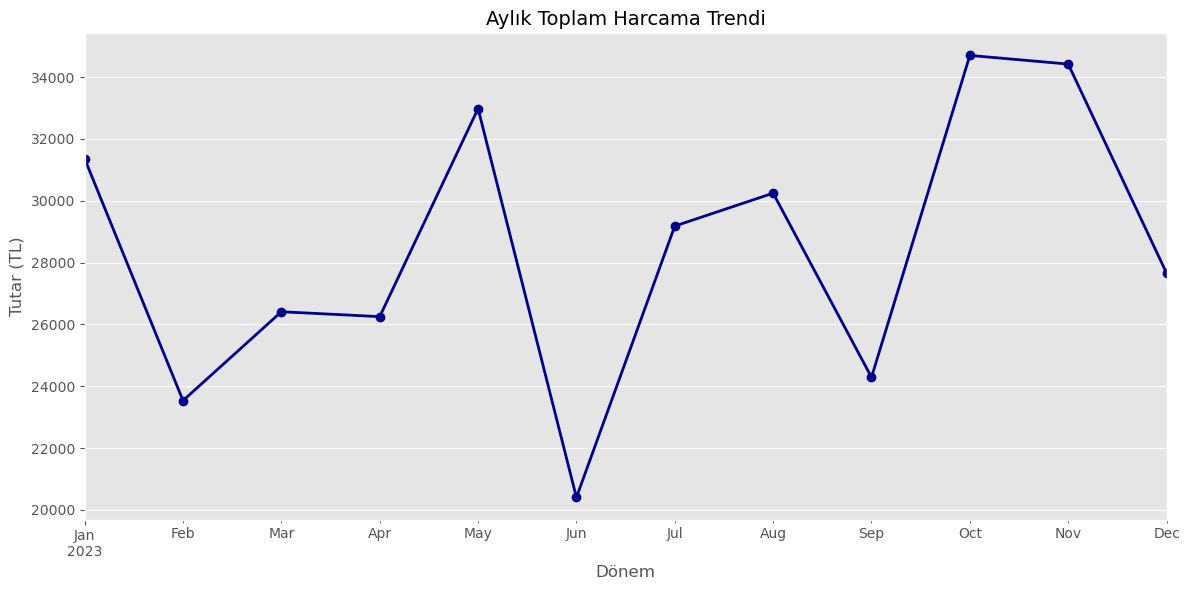

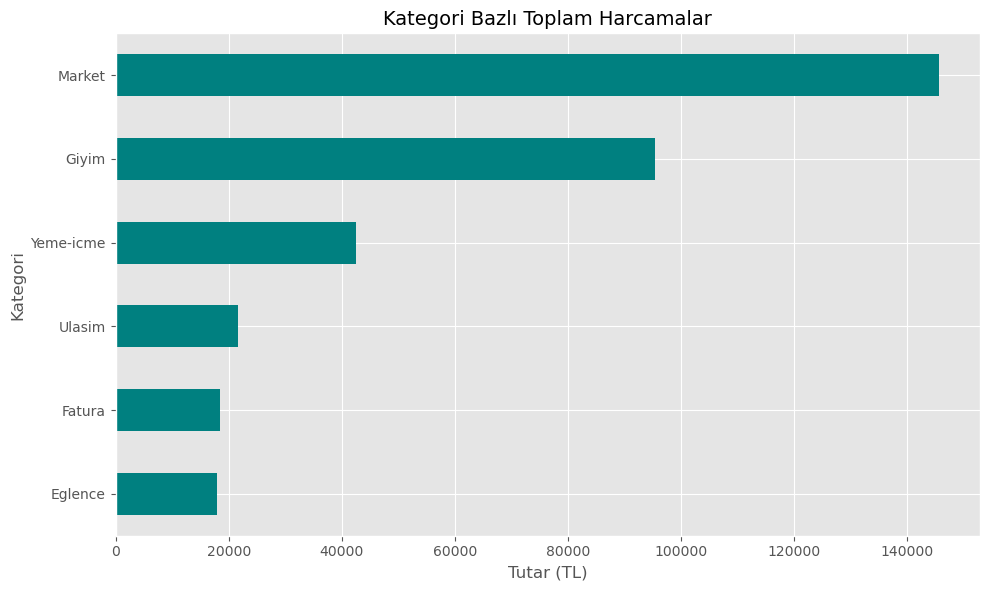

Görselleştirme dosyaları başarıyla kaydedildi.


In [36]:
# Pandas'ın varsayılan Matplotlib görselleştirmesi için estetik stil belirleme
plt.style.use('ggplot')

# 1. Aylık Harcama Trendi (Çizgi Grafik)
plt.figure(figsize=(12, 6))
# aylik_trend değişkeninin Tutar Series'i olarak ayarlanmış olması beklenir.
# Eğer aylik_trend bir DataFrame ise, sütun adı belirtilmeli: aylik_trend['Toplam Harcama'].plot(...)
aylik_trend.plot(kind='line', marker='o', linewidth=2, color='darkblue') 
plt.title('Aylık Toplam Harcama Trendi', fontsize=14)
plt.ylabel('Tutar (TL)')
plt.xlabel('Dönem')
plt.grid(True)
plt.tight_layout() # Etiket kesilmesini engeller
plt.savefig('aylik_harcama_trend_grafigi.png')
plt.close()

# 2. Kategori Dağılımı (Yatay Çubuk Grafik)
plt.figure(figsize=(10, 6))
# kategori_ozeti DataFrame'inden Toplam_Tutar sütununu alır ve sıralar.
kategori_ozet['Toplam_Tutar'].sort_values().plot(kind='barh', color='teal') 
plt.title('Kategori Bazlı Toplam Harcamalar', fontsize=14)
plt.xlabel('Tutar (TL)')
plt.tight_layout() # Etiket kesilmesini engeller
plt.savefig('kategori_dagilimi_grafigi.png')
plt.close()

print("Görselleştirme dosyaları başarıyla kaydedildi.")